In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import ADASYN
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').values.ravel()
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').values.ravel()

In [4]:
X_train.describe()


,gender,age,age_o,int_corr,samerace,date,exphappy,attr3_1,sinc3_1,fun3_1,...,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,goal_nan
count,6702.000000,6702.000000,6702.000000,6702.00000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,...,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000,6702.000000
mean,0.503432,26.338406,26.338406,0.19301,0.398836,4.999105,5.543868,7.089526,8.284244,7.700686,...,20.209725,17.458923,10.756121,11.982984,0.360489,0.075649,0.035512,0.062519,0.048791,0.009699
std,0.500026,3.573445,3.573445,0.30050,0.489695,1.447587,1.729792,1.385876,1.401148,1.563632,...,6.764335,6.044308,6.131794,6.322850,0.480178,0.264456,0.185083,0.242113,0.215448,0.098010
min,0.000000,18.000000,18.000000,-0.83000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,24.000000,-0.01000,0.000000,4.000000,5.000000,6.000000,8.000000,7.000000,...,17.310000,15.000000,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,26.000000,0.21000,0.000000,5.000000,6.000000,7.000000,8.000000,8.000000,...,20.000000,18.000000,10.000000,11.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,28.000000,28.000000,0.42000,1.000000,6.000000,7.000000,8.000000,9.000000,9.000000,...,23.260000,20.000000,15.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,55.000000,55.000000,0.91000,1.000000,7.000000,10.000000,10.000000,10.000000,10.000000,...,50.000000,50.000000,53.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
print(np.shape(X_train))
print(X_train[1:1])
print(np.shape(X_test))

(6702, 36)
Empty DataFrame
Columns: [gender, age, age_o, int_corr, samerace, date, exphappy, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr, sinc, intel, fun, amb, shar, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, goal_2.0, goal_3.0, goal_4.0, goal_5.0, goal_6.0, goal_nan]
Index: []

[0 rows x 36 columns]
(1676, 36)


# Feature Selection (correlation plot and RFE) 

['age_o', 'intel', 'fun', 'amb', 'shar'] correlated features


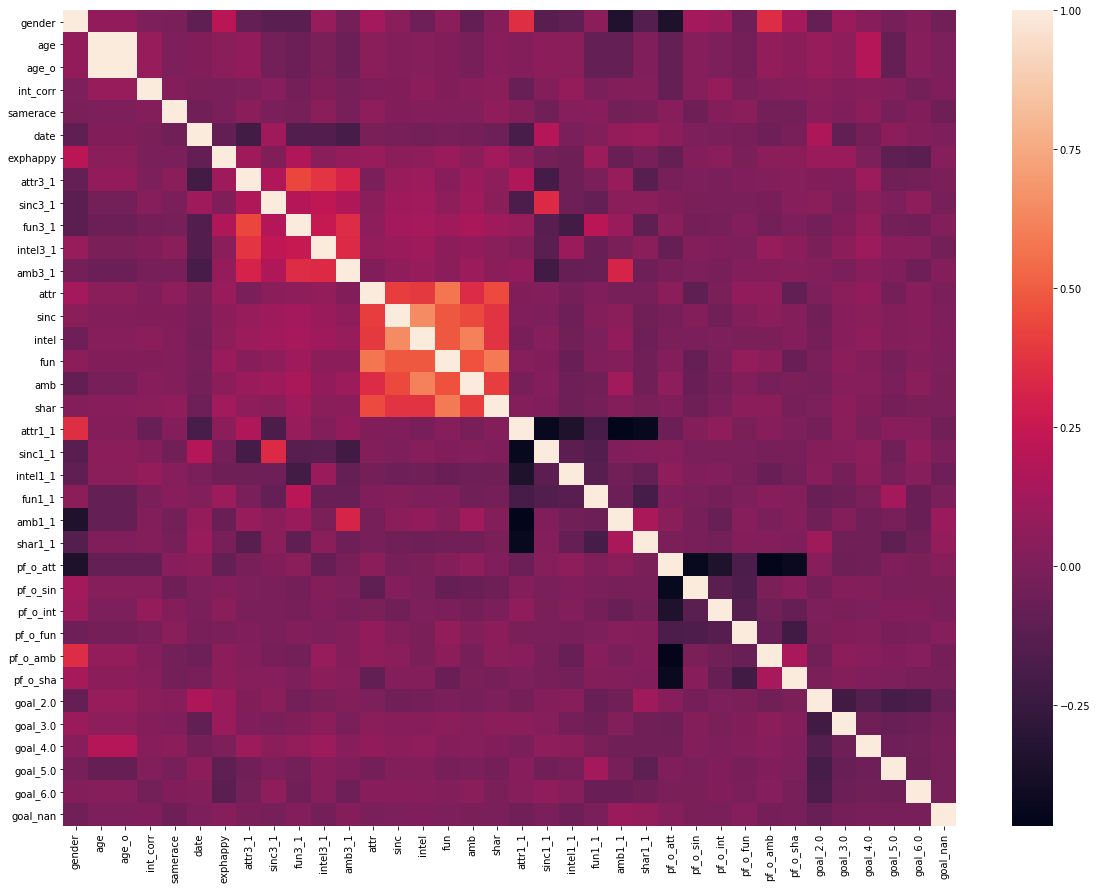

In [59]:
#Correlation plot
plt.subplots(figsize=(20,15))
import seaborn as sns
corr = X_train.corr()
corr_abs = corr.abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than a threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]

print(to_drop, "correlated features")
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)


In [39]:
##RFE with new dataset
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

Y = y_train
X = X_train
estimator = SVR(kernel = "linear")
selector = RFE(estimator, 15, step=1)
selector = selector.fit(X, Y)
print(selector.ranking_)
print(selector.support_)


[ 1  2  1  1  1  1  4  1 21 11  1  1  1 18  3  1  1  1  8  5 17 13 16  6
 10 12 15 14 22 20 19  1  7  9  1  1]
[ True False  True  True  True  True False  True False False  True  True
  True False False  True  True  True False False False False False False
 False False False False False False False  True False False  True  True]


In [55]:
#Pick attributes
bool_list = selector.support_
col_num = [i for i, x in enumerate(bool_list) if x]
X_train.iloc[:,col_num]


,gender,age_o,int_corr,samerace,date,attr3_1,intel3_1,amb3_1,attr,fun,amb,shar,goal_3.0,goal_6.0,goal_nan
0,0,24.0,0.54,0,6.0,6.0,8.0,7.0,4.0,5.0,6.0,6.0,0,0,0
1,0,25.0,0.31,0,4.0,8.0,8.0,9.0,2.0,4.0,6.0,5.0,0,0,0
2,0,28.0,0.55,1,5.0,8.0,7.0,7.0,7.0,8.0,7.0,7.0,0,0,0
3,0,23.0,-0.44,0,7.0,7.0,8.0,8.0,8.0,5.0,9.0,5.0,0,0,0
4,0,33.0,0.18,0,7.0,4.0,9.0,9.0,6.0,7.0,7.0,7.0,0,0,0
5,1,30.0,0.09,1,6.0,8.0,9.0,3.0,9.0,3.0,6.0,3.0,0,0,0
6,0,24.0,0.80,1,5.0,7.0,9.0,10.0,6.0,8.0,7.0,8.0,0,0,0
7,0,33.0,0.68,0,6.0,8.0,8.0,7.0,5.0,5.0,7.0,6.0,0,0,0
8,0,28.0,-0.27,0,7.0,8.0,8.0,5.0,7.0,5.0,5.0,5.0,0,0,0
9,0,29.0,0.50,0,6.0,6.0,9.0,3.0,8.0,8.0,8.0,8.0,0,1,0


In [40]:
#RFE with logistic regression classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# feature extraction
Y = y_train
X = X_train
model = LogisticRegression(solver='lbfgs', max_iter= 400)
rfe = RFE(model,5 )
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

Num Features: 5
Selected Features: [False False False  True False False False False False False False False
  True False False  True False False False False False False False False
 False False False False False False False  True False False  True False]
Feature Ranking: [ 5 16 12  1 14  6 13  9 27 15  8 22  1 21 10  1  7  3 20 18 31 32 19 17
 25 26 28 29 24 23  4  1  2 30  1 11]


In [36]:

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=5)
model.fit(X, Y)
print(np.argsort(model.feature_importances_ ))

[35 34 32 33 31  0 30  4  6 18 19  9  8  2 10 22 20  1 11  7 23 21  5 25
 13 28 16 24 26  3 27 14 29 15 12 17]


In [60]:
from sklearn.decomposition import PCA
# load data
pca = PCA(n_components=5)
fit = pca.fit(X_train)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
#print(fit.components_)

Explained Variance: [0.25552043 0.22309105 0.06804984 0.06774006 0.06288371]


# Logistic Regression

In [ ]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(LogisticRegression(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
lr = LogisticRegression(max_iter=3000, penalty='l2', solver='sag')
lr.fit(X_train,y_train).score(X_test, y_test)

In [ ]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

# Support Vector Machine

In [ ]:
# This ran for almost an hour

# params = {'C': [.1, 1, 10],
#           'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# gscv = GridSearchCV(SVC(), params, cv=3)
# gscv.fit(X_train, y_train)
# gscv.best_params_

In [ ]:
svc = SVC(C=10, kernel='poly')
svc.fit(X_train,y_train).score(X_test, y_test)

In [ ]:
y_score = svc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# k-Nearest Neighbor

In [ ]:
params = {'n_neighbors': [3, 5, 10],
          'p': [1, 2]}

gscv = GridSearchCV(KNeighborsClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, p=1)
knn.fit(X_train, y_train).score(X_test, y_test)

# Decision Tree

In [ ]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [3, 5, 7, 10, 12, 15, 25]}

gscv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X_train,y_train).score(X_test, y_test)

# Random Forest

In [ ]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(RandomForestClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=150)
rfc.fit(X_train,y_train).score(X_test, y_test)

In [ ]:
y_score = rfc.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Gradient Boosting

In [ ]:
params = {'n_estimators': [10, 50, 100, 150, 200],
          'max_depth': [5, 10, 25, 40, 60]}

gscv = GridSearchCV(GradientBoostingClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
gbc = GradientBoostingClassifier(max_depth=5)
gbc.fit(X_train,y_train).score(X_test, y_test)

In [ ]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# XGBoost

In [ ]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [3, 5, 10]}

gscv = GridSearchCV(XGBClassifier(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

In [ ]:
xgb = XGBClassifier(max_depth=5, n_estimators=150)
xgb.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
y_score = xgb.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(xgb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# Stacking

In [ ]:
ensemble = [LogisticRegression(max_iter=2000),GaussianNB(),KNeighborsClassifier()]
stc = StackingClassifier(ensemble,LogisticRegression(max_iter=2000))
stc.fit(X_train,y_train).score(X_test, y_test)

# Oversampling

In [ ]:
X_train_r, y_train_r = ADASYN().fit_sample(X_train, y_train)

In [ ]:
xgb = XGBClassifier(max_depth=5)
xgb.fit(X_train_r,y_train_r).score(X_test, y_test)

In [ ]:
y_score = gbc.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(gbc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))